## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Import file 

In [2]:
loans_df = pd.read_csv('loan.csv')
loans_df.head()

C:\Users\pisa01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Preliminary Analysis

In [3]:
loans_df.shape

(39717, 111)

In [4]:
loans_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Find columns with na values

In [5]:
loans_df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
loans_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
loans_df.isna().sum().sort_values().tail(120)

id                                0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
                              ...  
avg_cur_bal                   39717
bc_open_to_buy                39717
bc_util                       39717
mo_sin_old_rev_tl_op          39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### drop columns with all NA values

In [8]:
loans_df = loans_df.dropna(axis=1, how='all')

In [9]:
loans_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
loans_df.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [11]:
loans_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Droping Current loan status rows

In [12]:
loans_df = loans_df[loans_df['loan_status'] != 'Current']

### Coverting charged off to o and 1. 1 indicates charged off

In [13]:
loans_df['charged_off'] = loans_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

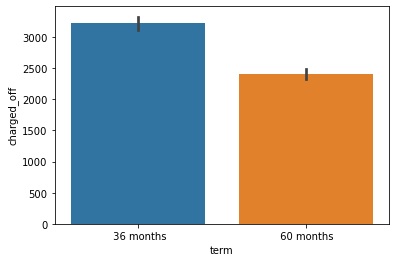

In [16]:
sns.barplot(x="term", y="charged_off", data=loans_df, estimator=lambda x: sum(x))

In [29]:
def univarite_estimator(x):
    return sum(x)*100.0/len(x)

def univarite_analysis(df, x, label_rotation=0):
    bar = sns.barplot(x=x, y='charged_off', data=df, estimator=univarite_estimator)
    bar.set_xticklabels(bar.get_xticklabels(), rotation=label_rotation, horizontalalignment='center')
    plt.plot()

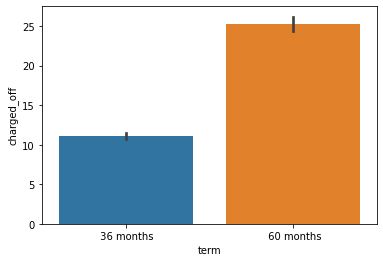

In [23]:
univarite_analysis(loans_df, 'term')

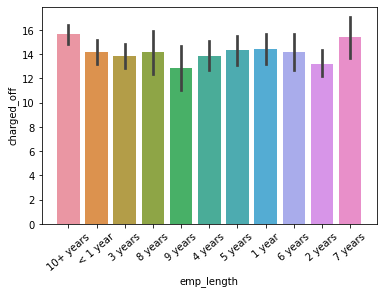

In [31]:
univarite_analysis(loans_df, 'emp_length', label_rotation=40)

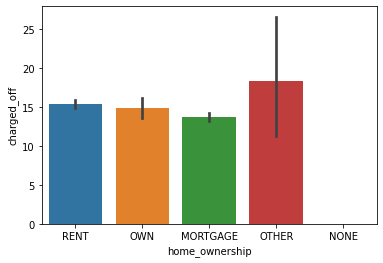

In [25]:
univarite_analysis(loans_df, 'home_ownership')

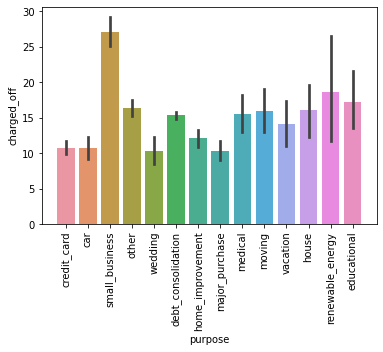

In [30]:
univarite_analysis(loans_df, 'purpose', label_rotation=90)

In [33]:
loans_df.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
17.46%      1
21.48%      1
16.96%      1
16.15%      1
20.52%      1
Name: int_rate, Length: 370, dtype: int64

### Convert to numeric

In [34]:
loans_df.int_rate = loans_df.int_rate.apply(lambda x: float(x[:-1]))

In [36]:
int_rate_labels = ['0-5%', '5-10%', '10-15%', '15-20%', '>20%']
int_rate_bins = [0, 5, 10, 15, 20, 100]
loans_df['int_rate_bin'] = pd.cut(loans_df['int_rate'], bins=int_rate_bins, labels=int_rate_labels)

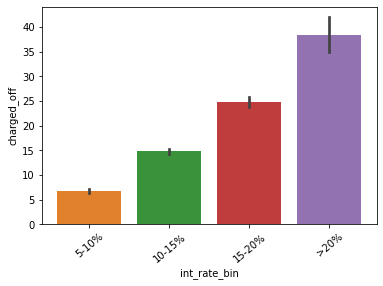

In [37]:
univarite_analysis(loans_df, 'int_rate_bin', label_rotation=40)

In [38]:
loans_df.loan_amnt.value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
13950       1
29175       1
13025       1
19150       1
28750       1
Name: loan_amnt, Length: 870, dtype: int64

In [39]:
loans_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [43]:
loans_df['loan_amnt_bins'] = pd.cut(loans_df['loan_amnt'], bins=np.linspace(0, 50000, 10))

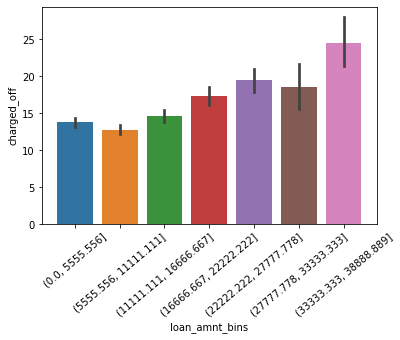

In [44]:
univarite_analysis(loans_df, 'loan_amnt_bins', label_rotation=40)

In [ ]:
sns.histplot(data=penguins, x='loan_status')

In [ ]:
loans_df.purpose.value_counts()

In [ ]:
loans_df.avg_cur_bal.value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

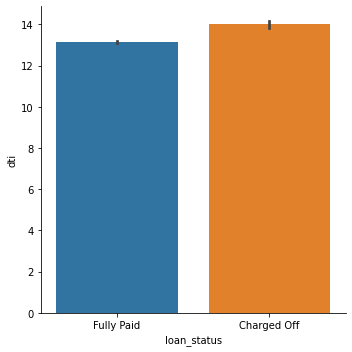

In [17]:
sns.catplot(x='loan_status', y='dti', data=loans_df, kind='bar')

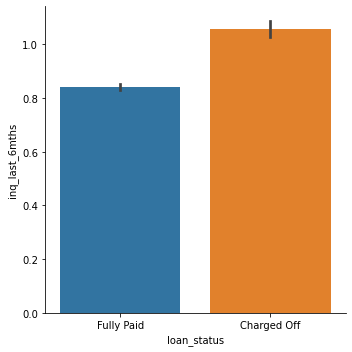

In [45]:
sns.catplot(x='loan_status', y='inq_last_6mths', data=loans_df, kind='bar')

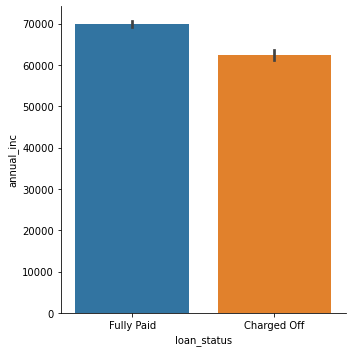

In [46]:
sns.catplot(x='loan_status', y='annual_inc', data=loans_df, kind='bar')

In [47]:
loans_df.inq_last_6mths.value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

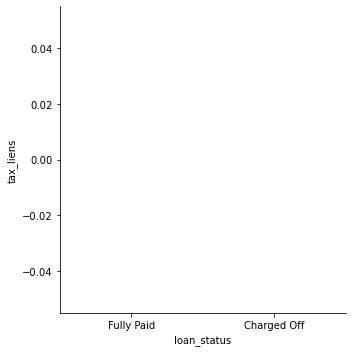

In [48]:
sns.catplot(x='loan_status', y='tax_liens', data=loans_df, kind='bar')

In [49]:
loans_df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [50]:
loans_df.tax_liens.value_counts()

0.0    38538
Name: tax_liens, dtype: int64

In [51]:
loans_df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [52]:
loans_group_by = loans_df.groupby(['loan_status', 'home_ownership']).home_ownership.count();
loans_group_by

loan_status  home_ownership
Charged Off  MORTGAGE           2327
             OTHER                18
             OWN                 443
             RENT               2839
Fully Paid   MORTGAGE          14694
             NONE                  3
             OTHER                80
             OWN                2532
             RENT              15641
Name: home_ownership, dtype: int64

In [53]:
loans_group_by_per = loans_group_by.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [54]:
loans_group_by_per = loans_group_by_per.reset_index(name='count');

In [55]:
loans_group_by_per_p = loans_group_by_per.pivot(index='loan_status', columns='home_ownership', values='count')
loans_group_by_per_p

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,41.354185,NaN,0.319886,7.872756,50.453172
Fully Paid,44.594841,0.009105,0.242792,7.684370,47.468892


In [56]:
loans_group_by_per_p.fillna(0, inplace=True)

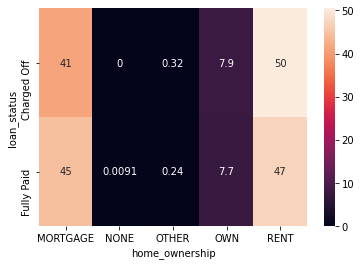

In [57]:
sns.heatmap(data=loans_group_by_per_p, annot=True)

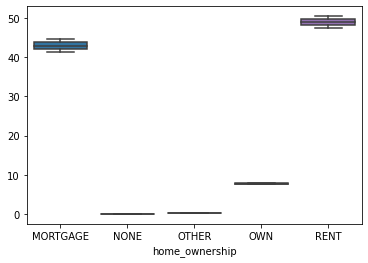

In [58]:
sns.boxplot(data=loans_group_by_per_p)

In [59]:
loans_group_by = loans_df.groupby(['loan_status', 'home_ownership']).home_ownership.count();
loans_group_by

loan_status  home_ownership
Charged Off  MORTGAGE           2327
             OTHER                18
             OWN                 443
             RENT               2839
Fully Paid   MORTGAGE          14694
             NONE                  3
             OTHER                80
             OWN                2532
             RENT              15641
Name: home_ownership, dtype: int64

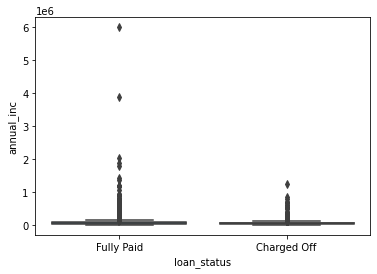

In [60]:
 sns.boxplot(x="loan_status", y="annual_inc", data=loans_df)

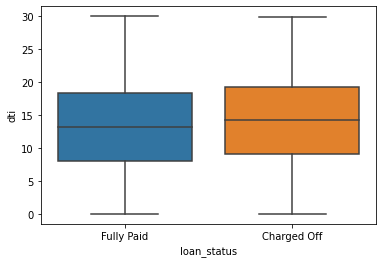

In [61]:
 sns.boxplot(x="loan_status", y="dti", data=loans_df)

In [62]:
loans_df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [63]:
loans_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [64]:
emp_length_grp = loans_df.groupby(['loan_status', 'emp_length']).emp_length.count();
emp_length_grp

loan_status  emp_length
Charged Off  1 year         456
             10+ years     1331
             2 years        567
             3 years        555
             4 years        462
             5 years        458
             6 years        307
             7 years        263
             8 years        203
             9 years        158
             < 1 year       639
Fully Paid   1 year        2713
             10+ years     7157
             2 years       3724
             3 years       3457
             4 years       2880
             5 years       2736
             6 years       1861
             7 years       1448
             8 years       1232
             9 years       1068
             < 1 year      3869
Name: emp_length, dtype: int64

In [65]:
def draw_boxplot_percentage(df, x_axis, y_axis):
    df_groupby = df.groupby([x_axis, y_axis])[y_axis].count();
    df_groupby = df_groupby.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    df_groupby = df_groupby.reset_index(name='count');
    df_groupby_pivot = df_groupby.pivot(index=x_axis, columns=y_axis, values='count')
    df_groupby_pivot.fillna(0, inplace=True)
    fig, ax = plt.subplots(figsize=(12,6))
    sns.heatmap(data=df_groupby_pivot, annot=True, ax=ax)


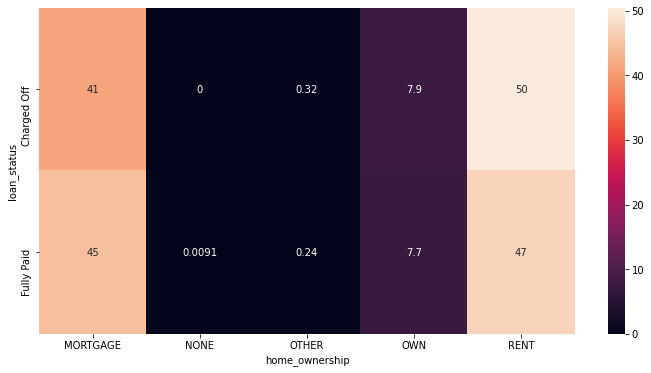

In [66]:
draw_boxplot_percentage(df=loans_df, x_axis = 'loan_status', y_axis='home_ownership')

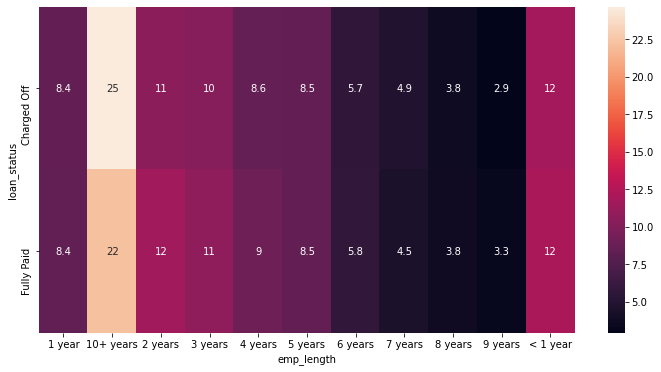

In [67]:
draw_boxplot_percentage(df=loans_df, x_axis = 'loan_status', y_axis='emp_length')

In [68]:
loans_df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [69]:
loans_df.annual_inc.quantile(.9)

115000.0

In [70]:
loans_df.annual_inc.quantile(.1)

30000.0

In [71]:
loans_df_quantile = loans_df[(loans_df.annual_inc > loans_df.annual_inc.quantile(.25)) & (loans_df.annual_inc < loans_df.annual_inc.quantile(.75))]

In [72]:
loans_df_quantile.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,charged_off,int_rate_bin,loan_amnt_bins
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,10-15%,"(5555.556, 11111.111]"
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,1313.76,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,15-20%,"(5555.556, 11111.111]"
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.0,0.0,Jan-15,111.34,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,15-20%,"(0.0, 5555.556]"
10,1070078,1305201,6500,6500,6500.0,60 months,14.65,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0,Jan-98,2,NaN,NaN,14,0,4032,20.60%,23,f,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.0,0.0,Jun-13,1655.54,NaN,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,10-15%,"(5555.556, 11111.111]"
11,1069908,1305008,12000,12000,12000.0,36 months,12.69,402.54,B,B5,UCLA,10+ years,OWN,75000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Consolidation,913xx,CA,10.78,0,Oct-89,0,NaN,NaN,12,0,23336,67.10%,34,f,0.0,0.0,13947.989160,13947.99,12000.00,1947.99,0.00,0.0,0.0,Sep-13,6315.30,NaN,Aug-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,10-15%,"(11111.111, 16666.667]"


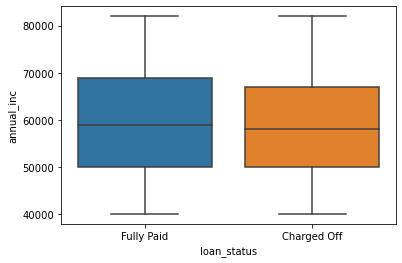

In [73]:
sns.boxplot(x="loan_status", y="annual_inc", data=loans_df_quantile)

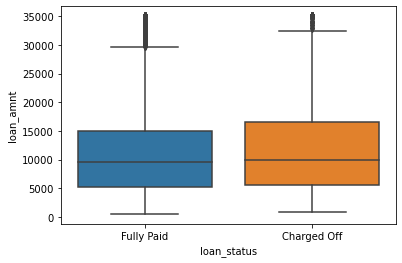

In [76]:
sns.boxplot(x="loan_status", y="loan_amnt", data=loans_df) 

In [77]:
loans_df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

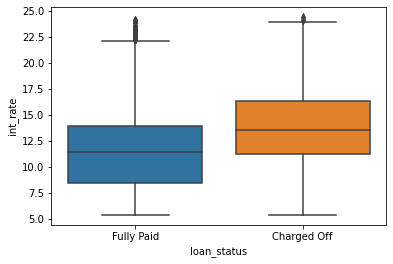

In [78]:
sns.boxplot(x="loan_status", y="int_rate", data=loans_df) 

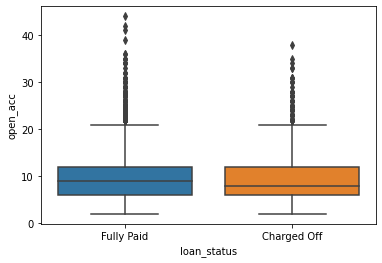

In [79]:
sns.boxplot(x="loan_status", y="open_acc", data=loans_df)

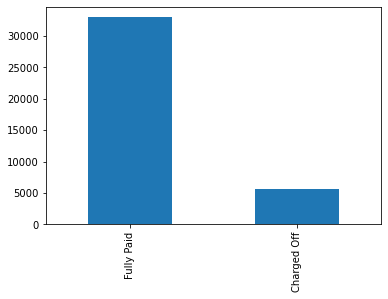

In [80]:
loans_df['loan_status'].value_counts().plot.bar()

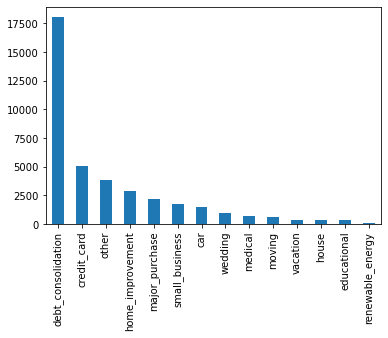

In [81]:
loans_df['purpose'].value_counts().plot.bar()

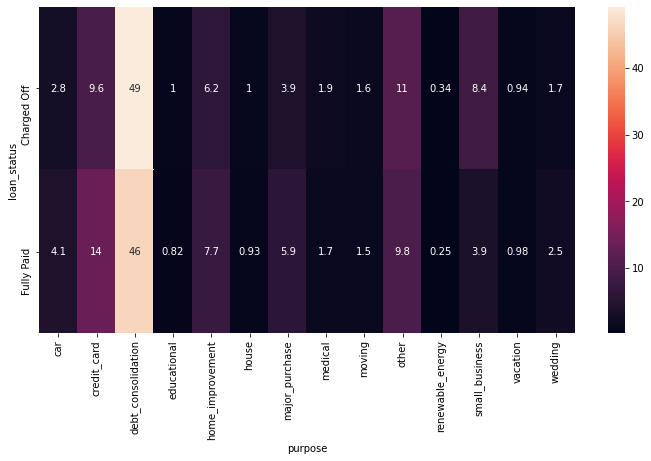

In [82]:
draw_boxplot_percentage(df=loans_df, x_axis = 'loan_status', y_axis='purpose')

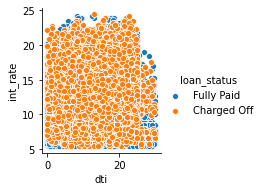

In [83]:
sns.pairplot(x_vars=['dti'], y_vars=['int_rate'], hue='loan_status', data=loans_df)

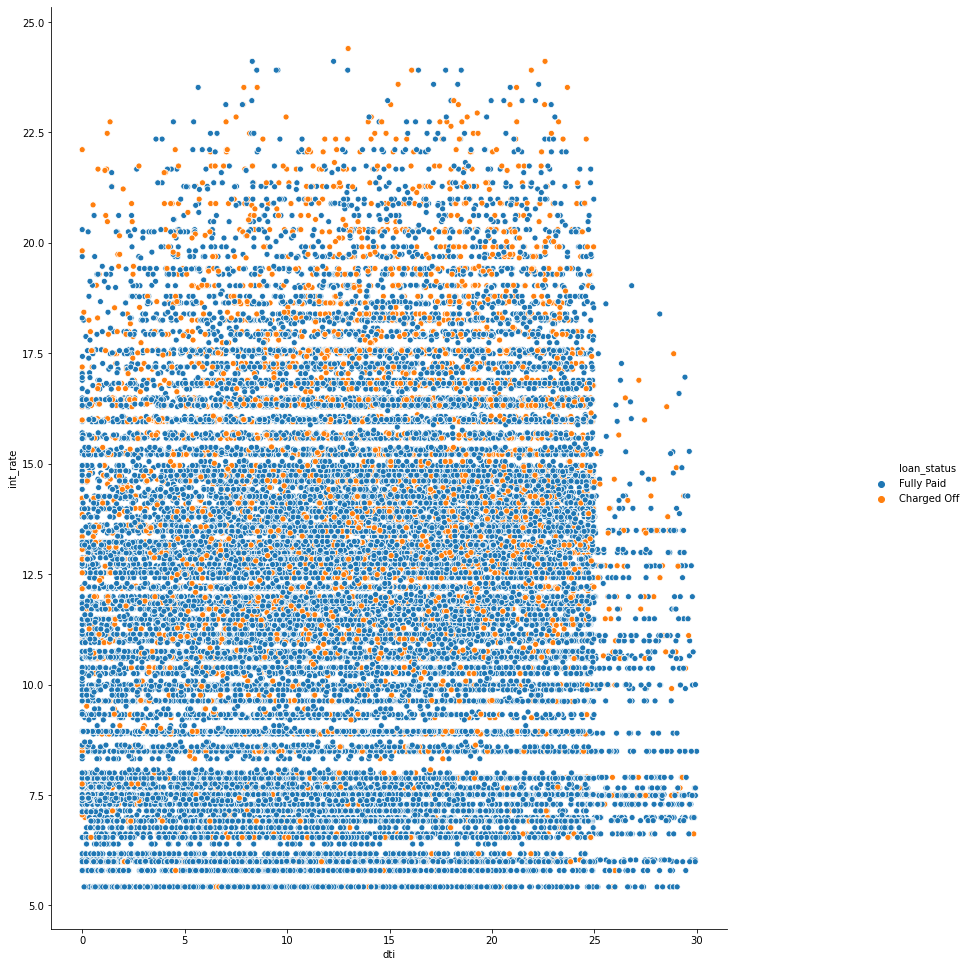

In [84]:
rplot = sns.relplot( x='dti', y='int_rate',  hue='loan_status', data=loans_df)
rplot.fig.set_size_inches(15,15)

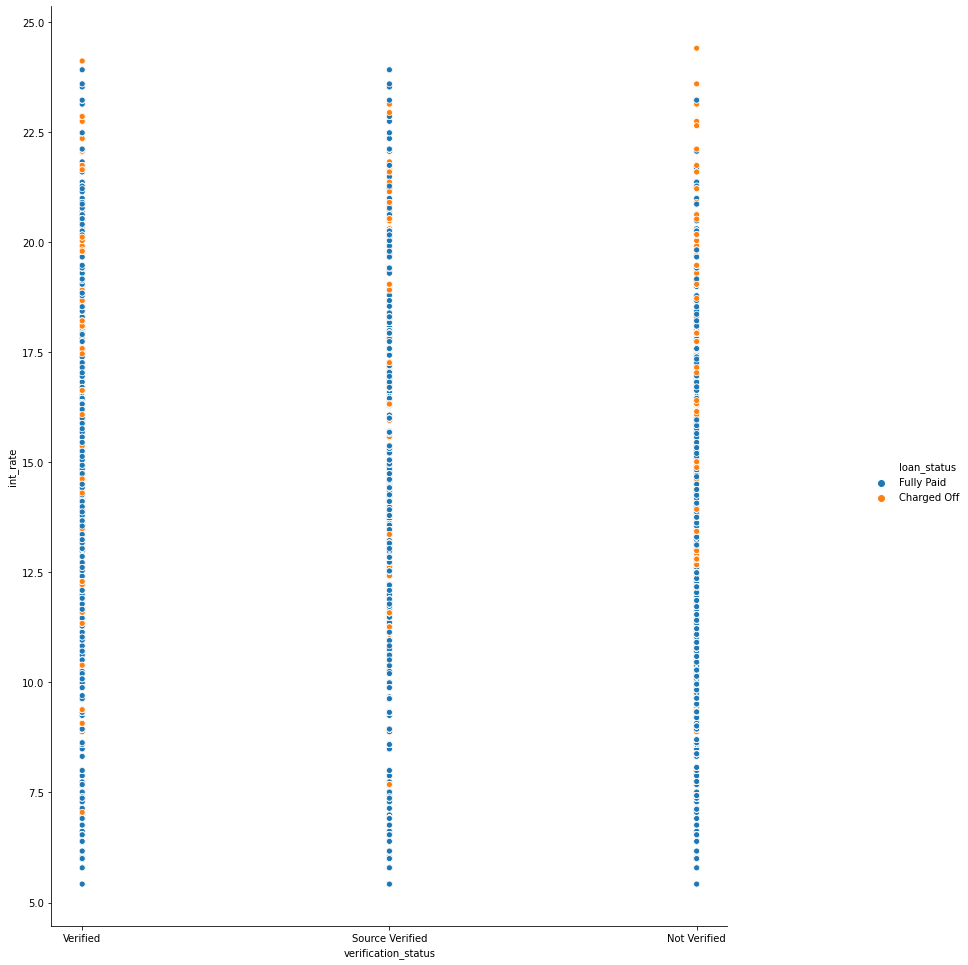

In [85]:
rplot = sns.relplot( x='verification_status', y='int_rate',  hue='loan_status', data=loans_df)
rplot.fig.set_size_inches(15,15)

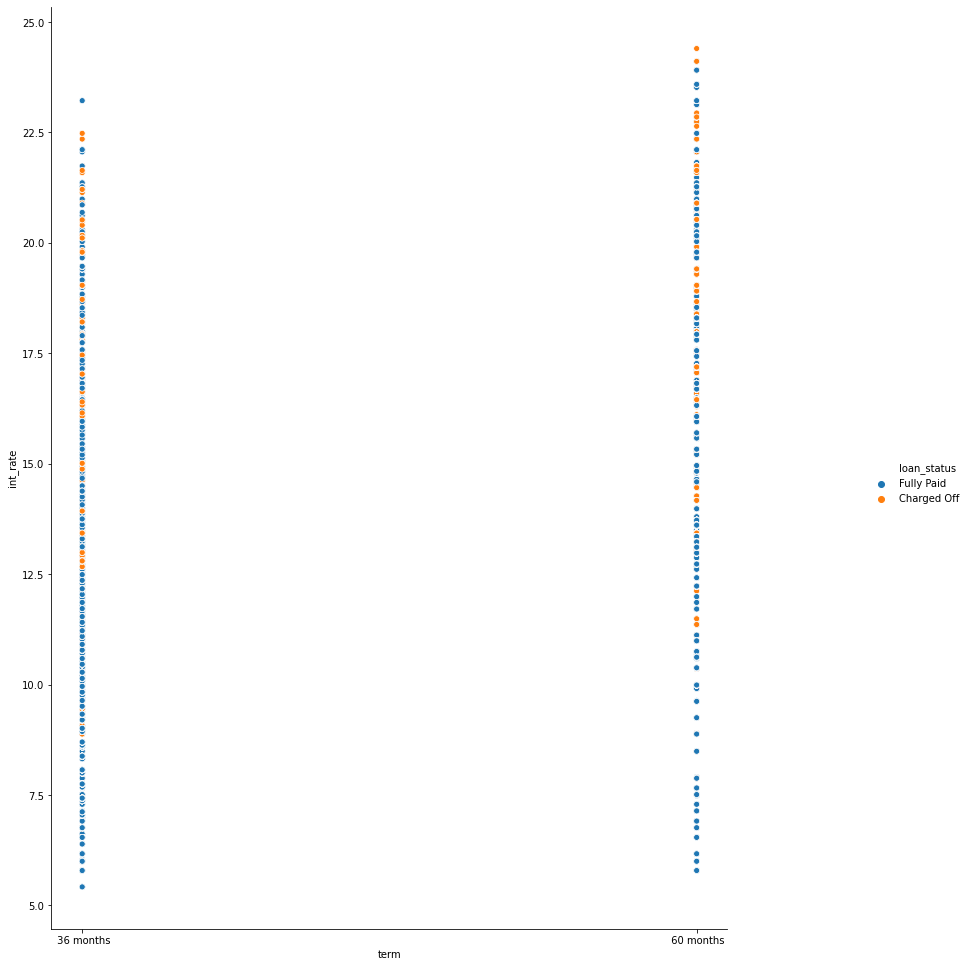

In [86]:
rplot = sns.relplot( x='term', y='int_rate',  hue='loan_status', data=loans_df)
rplot.fig.set_size_inches(15,15)

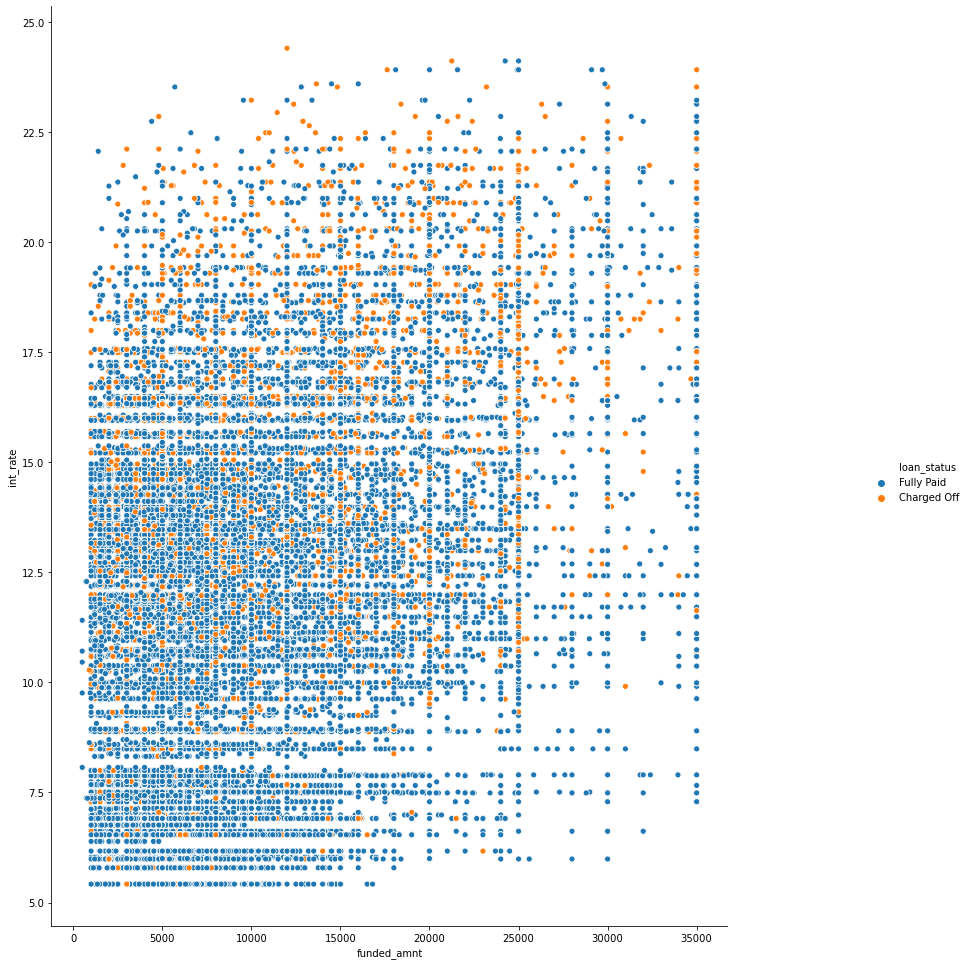

In [87]:
rplot = sns.relplot( x='funded_amnt', y='int_rate',  hue='loan_status', data=loans_df)
rplot.fig.set_size_inches(15,15)

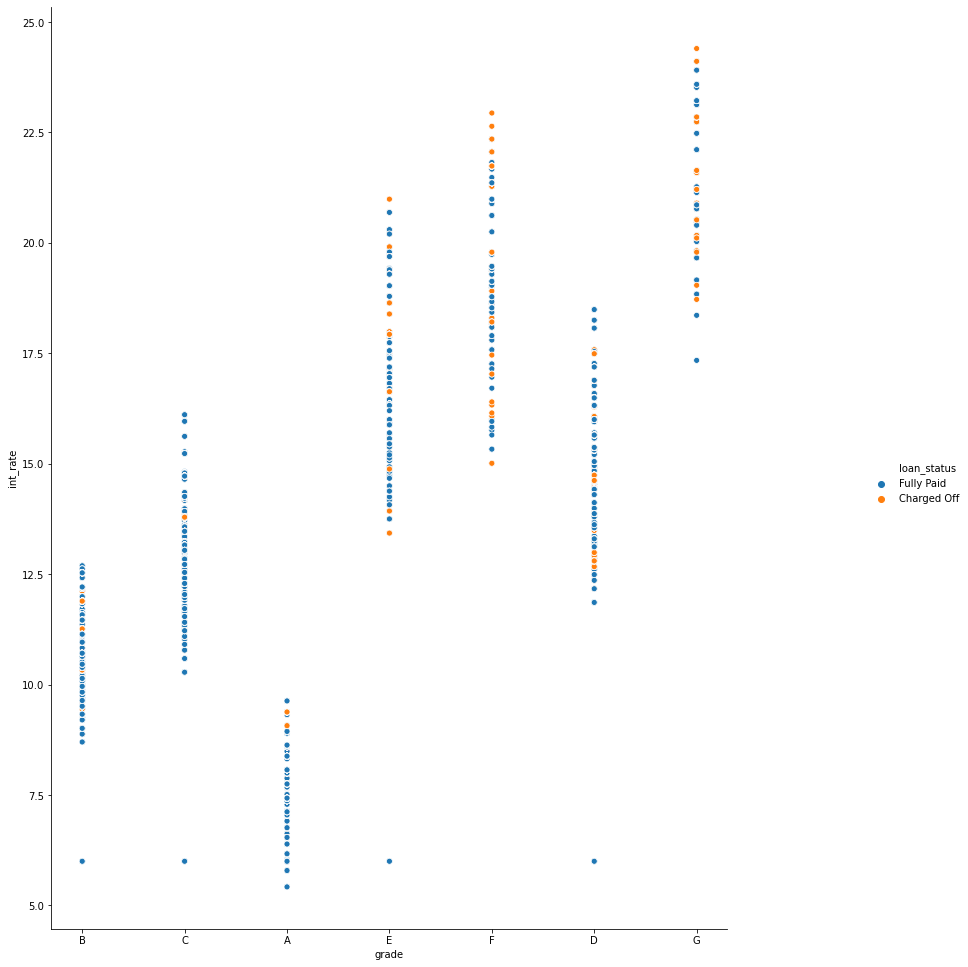

In [88]:
rplot = sns.relplot( x='grade', y='int_rate',  hue='loan_status', data=loans_df)
rplot.fig.set_size_inches(15,15)